_**Lab Demonstration 1**_

<u><strong>Part 1</u>

In [1]:
import torch
import numpy as np

In [2]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.0.1


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [5]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

In [6]:
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

In [7]:
# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)

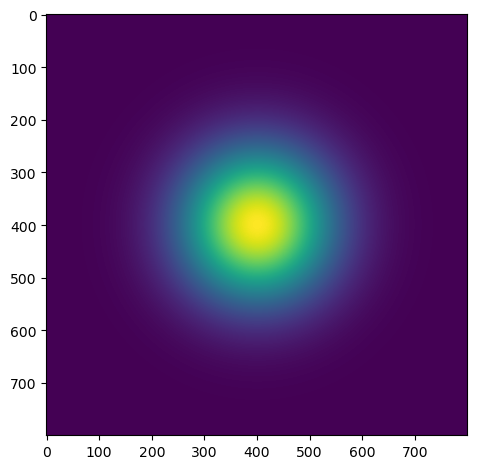

In [8]:
#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

1) Change the Gaussian function into a 2D sine or cosine function

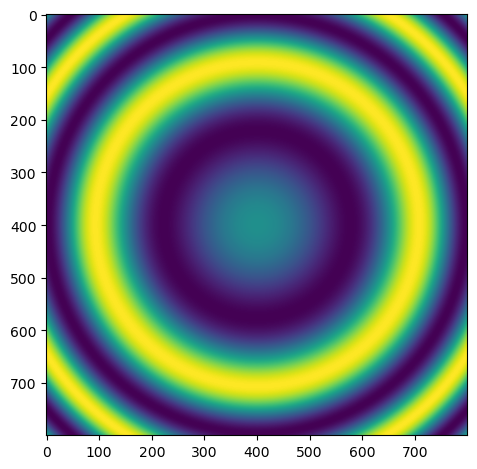

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute 2D sine function
z = 2*torch.sin(-(x**2+y**2)/2.0)

#plot
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()


2.What do you get when you multiply both the Gaussian and the sine/cosine function together and
visualise it?

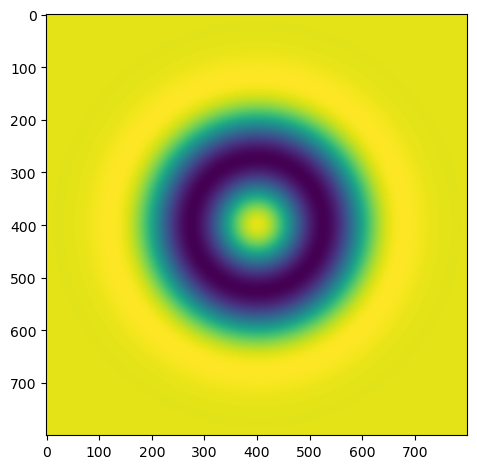

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute 2D sine function
z = torch.exp(-(x**2+y**2)/2.0)*2*torch.sin(-(x**2+y**2)/2.0)

#plot
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()


<u><strong>Part 2</u>

Mandlebrot Set

C:\Users\rachi\AppData\Local\Temp\ipykernel_8876\1809485188.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


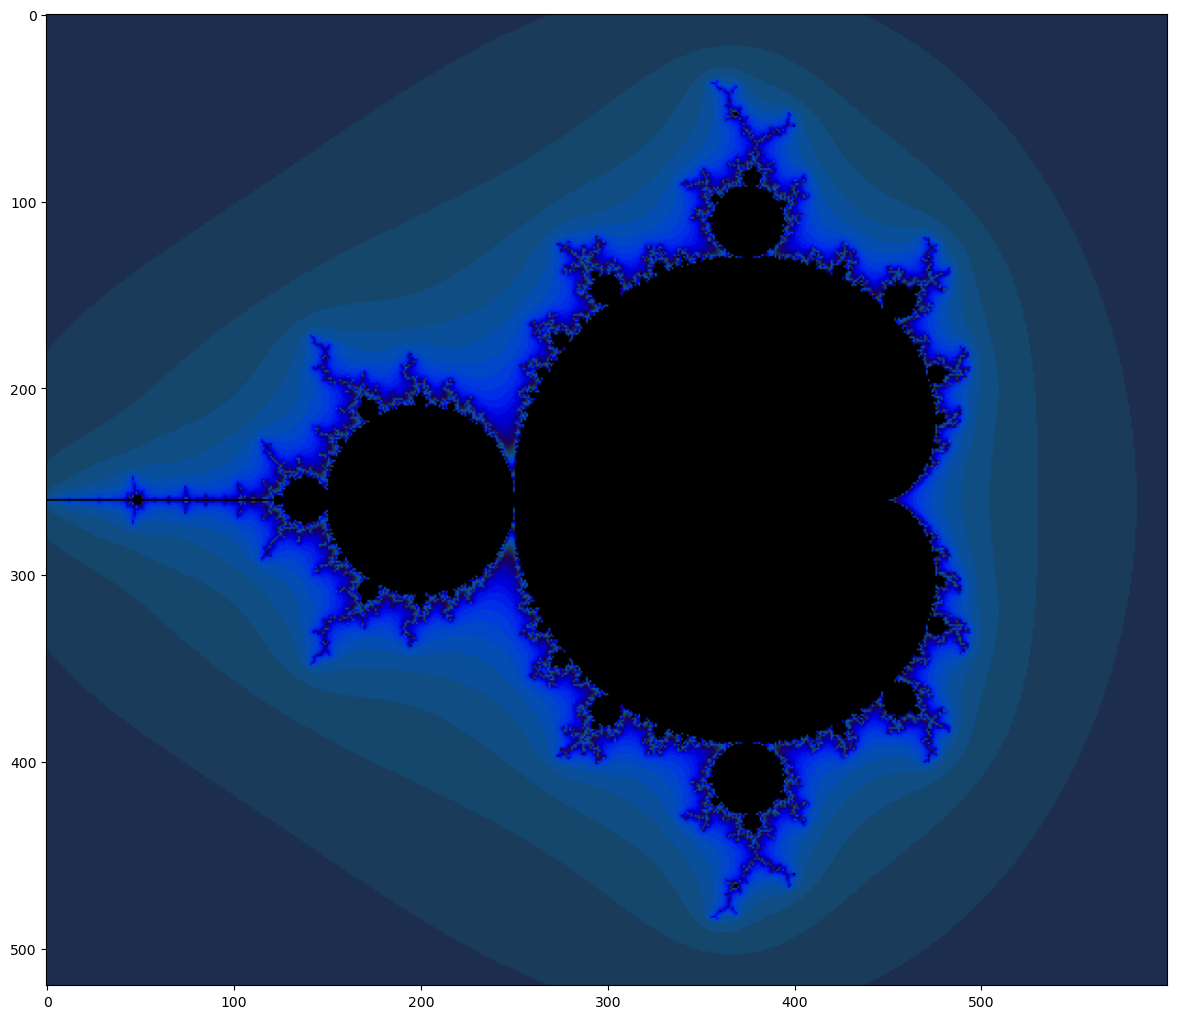

In [16]:
import torch
import numpy as np

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 # transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
#Mandelbrot Set
for i in range(200):
#Compute the new values of z: z^2 + x 
    zs_ = zs*zs + z
    not_diverged = torch.abs(zs_) < 4.0             
    #Update variables to compute
    ns += not_diverged
    zs = zs_
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
        a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
        img = np.concatenate([10+20*np.cos(a_cyclic),
        30+50*np.sin(a_cyclic),
        155-80*np.cos(a_cyclic)], 2)
        img[a==a.max()] = 0
        a = img
        a = np.uint8(np.clip(a, 0, 255))
        return a
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

1.High resolution computation of the set by decreasing the mgrid spacing and zooming to another
part of the Mandelbrot set and compute the image for it. This may increase the computation time
significantly, so choose a value that balances quality of the image and time spent. 

C:\Users\rachi\AppData\Local\Temp\ipykernel_8876\3881881277.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


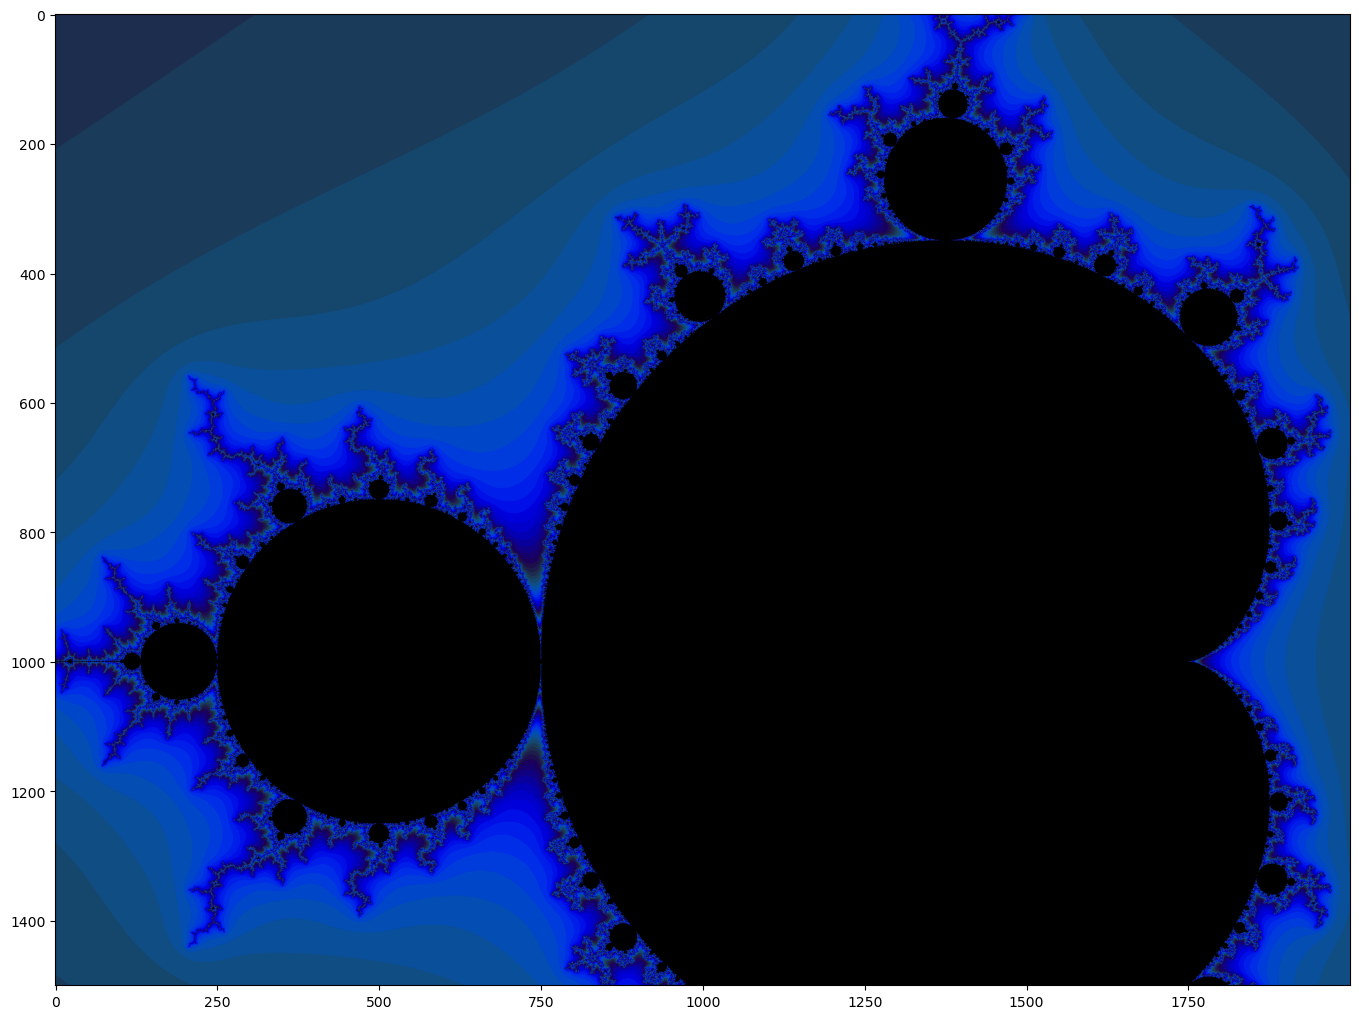

In [18]:
import torch
import numpy as np

# Adjust the grid parameters for higher resolution and zooming
Y, X = np.mgrid[-1:0.5:0.001, -1.5:0.5:0.001]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 # transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
# Mandelbrot Set computation with increased resolution
for i in range(1000):  # Increase the iteration count
    zs_ = zs * zs + z
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
        a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
        img = np.concatenate([10+20*np.cos(a_cyclic),
        30+50*np.sin(a_cyclic),
        155-80*np.cos(a_cyclic)], 2)
        img[a==a.max()] = 0
        a = img
        a = np.uint8(np.clip(a, 0, 255))
        return a
# Plot the higher resolution Mandelbrot Set
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()